SETUP

Research Question:
From the six variables of social support, personal freedom, government corruption level, generosity, GDP per capita, and life expectancy, which one contributes the most to the average citizen’s happiness?

Finland is currently the happiest country in the world according to the World Happiness Report.


In [288]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd

In [124]:
df_2015 = pd.read_csv('data/2015.csv')
df_2015.name = "df_2015"
df_2016 = pd.read_csv('data/2016.csv')
df_2016.name = "df_2016"
df_2017 = pd.read_csv('data/2017.csv')
df_2017.name = "df_2017"
df_2018 = pd.read_csv('data/2018.csv')
df_2018.name = "df_2018"
df_2019 = pd.read_csv('data/2019.csv')
df_2019.name = "df_2019"

Data Cleaning

Step one: Check for missing values

For proper data analysis and to avoid problems in the future data cleaning is very important. When we loaded in the datasets (2015.csv, 2016.csv, 2017.csv, 2018.csv, 2019.csv) we noticed that they were already pretty clean, but we still implemented a few adjustments in order to make the data look better. To begin the cleaning the best first step is to always check for any null values in the dataset that can cause error when try to manipulate or visualize the data.

In [125]:
print("These will show any missing values in the raw dataframes.\n")
year_list = [df_2015,df_2016,df_2017,df_2018,df_2019]
for i in year_list:
    print(i.name)
    print(i.isnull().sum())
    print("\n")

These will show any missing values in the raw dataframes.

df_2015
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


df_2016
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


df_2017
Country     

In the previous cell we used a simple loop to go through all the datasets we will be using. We observe that there is only one null value in the "df_2018" dataframe in the "Perceptions of corruption" column. It's pretty amazing to see that there is only ONE null value. This makes the missing value cleaning process very easy. We will not be having to impute any data, remove large portions of our data, or replace any data with either means/median. Doing this may not be the best for data analysis purpose since those data points would be fabricated by us.  

Step two: Standardize columns

Since we will be dealing with 5 different datasets we must be able to standardized between the different datasets by first exploring and understanding each dataset. Initially we noticed that the datasets had very similar columns which we were: "Happiness Rank," "Happiness Score," "Country," "GDP," "Life Expectancy," "Freedom," "Government Corruption," "Generosity." It was observed however that there were many variations of these column names within each dataset so I was able to rename them in order to have a standard column name for each dataset. This will be useful when wanting to compare the same column between two or more different datasets. 

In [126]:
#Before cleaning df_2015
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [127]:
df_2015 = pd.read_csv('data/2015.csv')
df_2015.count()
#We see that there is 158 rows in each column
df_2015 = df_2015.rename(columns={"Economy (GDP per Capita)":"GDP", "Health (Life Expectancy)":"Life Expectancy", "Trust (Government Corruption)":"Government Corruption"})                 
df_2015 = df_2015.drop(columns=["Region","Standard Error", "Family", "Dystopia Residual"])
#df_2015.columns.tolist() #Get the list of columns
df_2015 = df_2015[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity']]
print("df_2015 data types:\n" + str(df_2015.dtypes))
df_2015.head()

df_2015 data types:
Happiness Rank             int64
Happiness Score          float64
Country                   object
GDP                      float64
Life Expectancy          float64
Freedom                  float64
Government Corruption    float64
Generosity               float64
dtype: object


,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity
0,1,7.587,Switzerland,1.39651,0.94143,0.66557,0.41978,0.29678
1,2,7.561,Iceland,1.30232,0.94784,0.62877,0.14145,0.43630
2,3,7.527,Denmark,1.32548,0.87464,0.64938,0.48357,0.34139
3,4,7.522,Norway,1.45900,0.88521,0.66973,0.36503,0.34699
4,5,7.427,Canada,1.32629,0.90563,0.63297,0.32957,0.45811


Cleaning df_2015: Off the top of our heads we noticed that the df_2015 dataset has 12 columns which contained column titles that were very clean. We opted however to rename some of them in order to create more simple dataframe titles. We also dropped a few columns that seemed irrelevant for data analysis or weren't common to other datasets. We utilized the "dtypes" function in order to make sure that all the data types of the dataset were ones we can use for the data analysis. We made sure that all the numbers are either ints or floats so we can compute or visual them. The order of the df is was also altered moving the columns in a way to be generalized across all five datasets. Putting the "Happiness Rank" and "Happiness Score" at the far left along with the country name, and putting the features to the right of those three columns.  

In [128]:
#Before cleaning df_2016
df_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [129]:
df_2016 = pd.read_csv('data/2016.csv')
df_2016.count()
#We see that there is 157 rows in each column
df_2016 = df_2016.rename(columns={"Economy (GDP per Capita)":"GDP", "Health (Life Expectancy)":"Life Expectancy", "Trust (Government Corruption)":"Government Corruption"})                 
df_2016 = df_2016.drop(columns=["Region", "Lower Confidence Interval", "Upper Confidence Interval", "Family", "Dystopia Residual"])
#df_2015.columns.tolist() #Get the list of columns
df_2016 = df_2016[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity']]
print("df_2016 data types:\n" + str(df_2016.dtypes))
df_2016.head()

df_2016 data types:
Happiness Rank             int64
Happiness Score          float64
Country                   object
GDP                      float64
Life Expectancy          float64
Freedom                  float64
Government Corruption    float64
Generosity               float64
dtype: object


,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity
0,1,7.526,Denmark,1.44178,0.79504,0.57941,0.44453,0.36171
1,2,7.509,Switzerland,1.52733,0.86303,0.58557,0.41203,0.28083
2,3,7.501,Iceland,1.42666,0.86733,0.56624,0.14975,0.47678
3,4,7.498,Norway,1.57744,0.79579,0.59609,0.35776,0.37895
4,5,7.413,Finland,1.40598,0.81091,0.57104,0.41004,0.25492


Cleaning df_2016: The process to clean df_2016 is very similar to the process to clean df_2015. The only differences between the two datasets are that df_2016 contains one less row and also includes one more column. Instead of the standard error column in df_2015, df_2016 contains two columns: "Lower Confidence Interval" and "Upper Confidence Interval" as a replacement for the "Standard Error." However, these are not necessary in order to perform our data analysis and are represented differntly among the datasets so we will be dropping both of these columns. Likewise in df_2015 we will be organizing the columns in a way that is standardized.  

In [130]:
#Before cleaning df_2017
df_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [131]:
df_2017 = pd.read_csv('data/2017.csv')
df_2017.count()
#We see that there is 155 rows in each column
df_2017 = df_2017.rename(columns={"Happiness.Rank":"Happiness Rank","Happiness.Score":"Happiness Score", "Economy..GDP.per.Capita.":"GDP", "Health..Life.Expectancy.":"Life Expectancy", "Trust..Government.Corruption.":"Government Corruption"})                 
df_2017 = df_2017.drop(columns=["Whisker.high", "Whisker.low", "Family", "Dystopia.Residual"])
#df_2015.columns.tolist() #Get the list of columns
df_2017 = df_2017[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity']]
df_2017.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity
0,1,7.537,Norway,1.616463,0.796667,0.635423,0.315964,0.362012
1,2,7.522,Denmark,1.482383,0.792566,0.626007,0.400770,0.355280
2,3,7.504,Iceland,1.480633,0.833552,0.627163,0.153527,0.475540
3,4,7.494,Switzerland,1.564980,0.858131,0.620071,0.367007,0.290549
4,5,7.469,Finland,1.443572,0.809158,0.617951,0.382612,0.245483


Cleaning df_2017: Right off the bat when cleaning this dataset we observed the messy names for the columns. There are periods that seperate words instead of spaces. This was definitely a priority when cleaning the dataset. We were able to change all the necessary columns to the standard that we have created to resemble the previous datasets cleaned. Order is the same as previous datasets that were cleaned.

In [132]:
#Before cleaning df_2018
df_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [133]:
df_2018 = pd.read_csv('data/2018.csv')
df_2018.count()
#We see that there is 156 rows in each column
df_2018 = df_2018.rename(columns={"Overall rank":"Happiness Rank","Country or region":"Country", "Score":"Happiness Score", "GDP per capita":"GDP", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Government Corruption"})                 
df_2018 = df_2018.drop(columns=[])
#df_2015.columns.tolist() #Get the list of columns
df_2018 = df_2018[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity','Social support']]
df_2018.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity,Social support
0,1,7.632,Finland,1.305,0.874,0.681,0.393,0.202,1.592
1,2,7.594,Norway,1.456,0.861,0.686,0.340,0.286,1.582
2,3,7.555,Denmark,1.351,0.868,0.683,0.408,0.284,1.590
3,4,7.495,Iceland,1.343,0.914,0.677,0.138,0.353,1.644
4,5,7.487,Switzerland,1.420,0.927,0.660,0.357,0.256,1.549


Cleaning df_2018: TODO

In [134]:
#Before cleaning df_2019
df_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [135]:
df_2019 = pd.read_csv('data/2019.csv')
df_2019.count()
#We see that there is 156 rows in each column
df_2019 = df_2019.rename(columns={"Overall rank":"Happiness Rank","Country or region":"Country", "Score":"Happiness Score", "GDP per capita":"GDP", "Healthy life expectancy":"Life Expectancy", "Freedom to make life choices":"Freedom", "Perceptions of corruption":"Government Corruption"})                 
df_2019 = df_2019.drop(columns=[])
#df_2015.columns.tolist() #Get the list of columns
df_2019 = df_2019[['Happiness Rank','Happiness Score','Country','GDP','Life Expectancy', 'Freedom','Government Corruption','Generosity','Social support']]
df_2019.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity,Social support
0,1,7.769,Finland,1.340,0.986,0.596,0.393,0.153,1.587
1,2,7.600,Denmark,1.383,0.996,0.592,0.410,0.252,1.573
2,3,7.554,Norway,1.488,1.028,0.603,0.341,0.271,1.582
3,4,7.494,Iceland,1.380,1.026,0.591,0.118,0.354,1.624
4,5,7.488,Netherlands,1.396,0.999,0.557,0.298,0.322,1.522


Cleaning df_2019: TODO

Results from cleaning the datasets.

In [213]:
df_2015.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity
0,1,7.587,Switzerland,1.39651,0.94143,0.66557,0.41978,0.29678
1,2,7.561,Iceland,1.30232,0.94784,0.62877,0.14145,0.43630
2,3,7.527,Denmark,1.32548,0.87464,0.64938,0.48357,0.34139
3,4,7.522,Norway,1.45900,0.88521,0.66973,0.36503,0.34699
4,5,7.427,Canada,1.32629,0.90563,0.63297,0.32957,0.45811


In [214]:
df_2016.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity
0,1,7.526,Denmark,1.44178,0.79504,0.57941,0.44453,0.36171
1,2,7.509,Switzerland,1.52733,0.86303,0.58557,0.41203,0.28083
2,3,7.501,Iceland,1.42666,0.86733,0.56624,0.14975,0.47678
3,4,7.498,Norway,1.57744,0.79579,0.59609,0.35776,0.37895
4,5,7.413,Finland,1.40598,0.81091,0.57104,0.41004,0.25492


In [215]:
df_2017.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity
0,1,7.537,Norway,1.616463,0.796667,0.635423,0.315964,0.362012
1,2,7.522,Denmark,1.482383,0.792566,0.626007,0.400770,0.355280
2,3,7.504,Iceland,1.480633,0.833552,0.627163,0.153527,0.475540
3,4,7.494,Switzerland,1.564980,0.858131,0.620071,0.367007,0.290549
4,5,7.469,Finland,1.443572,0.809158,0.617951,0.382612,0.245483


In [216]:
df_2018.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity,Social support
0,1,7.632,Finland,1.305,0.874,0.681,0.393,0.202,1.592
1,2,7.594,Norway,1.456,0.861,0.686,0.340,0.286,1.582
2,3,7.555,Denmark,1.351,0.868,0.683,0.408,0.284,1.590
3,4,7.495,Iceland,1.343,0.914,0.677,0.138,0.353,1.644
4,5,7.487,Switzerland,1.420,0.927,0.660,0.357,0.256,1.549


In [217]:
df_2019.head()

,Happiness Rank,Happiness Score,Country,GDP,Life Expectancy,Freedom,Government Corruption,Generosity,Social support
0,1,7.769,Finland,1.340,0.986,0.596,0.393,0.153,1.587
1,2,7.600,Denmark,1.383,0.996,0.592,0.410,0.252,1.573
2,3,7.554,Norway,1.488,1.028,0.603,0.341,0.271,1.582
3,4,7.494,Iceland,1.380,1.026,0.591,0.118,0.354,1.624
4,5,7.488,Netherlands,1.396,0.999,0.557,0.298,0.322,1.522


# Data Analysis & Results

## Data Analysis on 2015 Dataframe

Filter Method:

We will be filtering the data and only taking the subset of relevant features. We are going to be using a correlation matrix using Pearson correlation in other to fidn out which features are relevant. We create a Pearson correlation heatmap and want to observe the correlation of independent variables with the output variable "Happiness Score." We will be only selecting features tht have a correlation of above 0.5 absolute value with the "Happiness Score."

The correlation coefficient will be a value that lies between -1 and 1. Values that are close to 0 imply that there is a weaker correlation. Values that are closer to +1 implies that there is a greater positive correlation. Values that are closer to -1 implies that there is a greater negative correlation. 

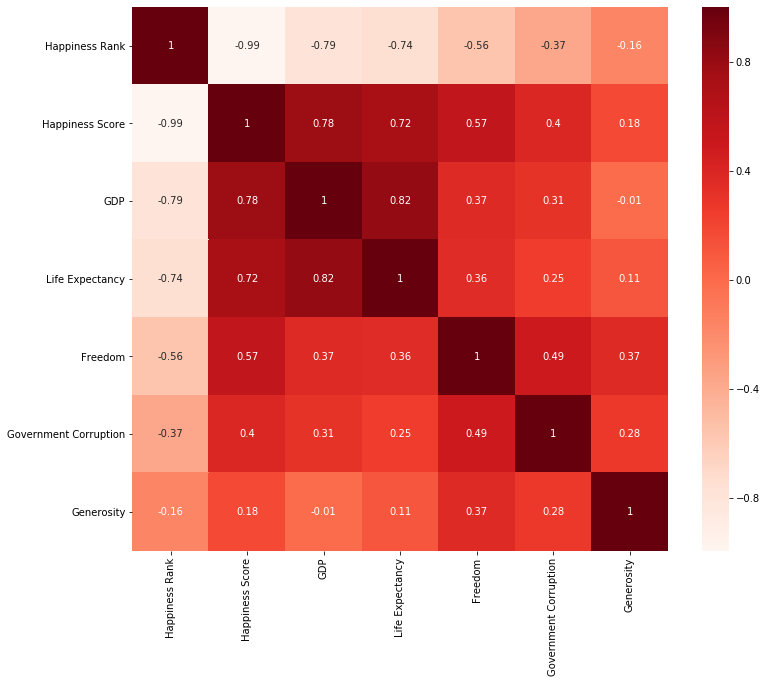

In [289]:
plt.figure(figsize=(12,10))
cor = df_2015.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [290]:
#Correlation with output variable
cor_target = abs(cor["Happiness Score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness Rank     0.992105
Happiness Score    1.000000
GDP                0.780966
Life Expectancy    0.724200
Freedom            0.568211
Name: Happiness Score, dtype: float64

After creating the Pearson correlation heatmap we see that the features that are highly correlated with the "Happiness Score" are "GDP", "Life Expectancy", and "Freedom." We will not be counting the "Happiness Rank" since it is directly dependent on the "Happiness Score." This allows us to drop "Happiness Rank", "Government Corruption", and "Generosity." 

We see that "GDP" is feature that is most correlated to the "Happiness Score." But we see something that is intersting between "GDP" and "Life Expectancy." We see how they are correlated with each other.

In [291]:
print(df_2015[["GDP","Life Expectancy"]].corr())
print(df_2015[["GDP","Freedom"]].corr())
print(df_2015[["Life Expectancy","Freedom"]].corr())

                      GDP  Life Expectancy
GDP              1.000000         0.816478
Life Expectancy  0.816478         1.000000
            GDP  Freedom
GDP      1.0000   0.3703
Freedom  0.3703   1.0000
                 Life Expectancy   Freedom
Life Expectancy         1.000000  0.360477
Freedom                 0.360477  1.000000


From the code above, we see the variables "GDP" and "Life Expectancy" are highly correlated with each other with a value of 0.816478. So this will be hard to show exactly which feature has a larger influence over the "Happiness Score" since they seem to correlate with each other at a high rate.

(array([3., 0., 2., 5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 2., 8.]),
 array([2.839 , 3.0764, 3.3138, 3.5512, 3.7886, 4.026 , 4.2634, 4.5008,
        4.7382, 4.9756, 5.213 , 5.4504, 5.6878, 5.9252, 6.1626, 6.4   ,
        6.6374, 6.8748, 7.1122, 7.3496, 7.587 ]),
 <a list of 20 Patch objects>)

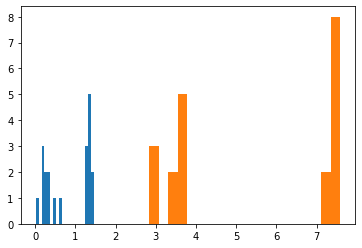

In [285]:
"""I DONT REALLY LIKE THIS CODE BUT WILL KEEP"""
df_2015.head()
top_ten_series = df_2015["Country"][:10]

bot_ten_series = df_2015["Country"][-10:]

top_and_bot = top_ten_series.append(bot_ten_series)
top_and_bot

X_arr = []
Y_arr = []
for i in np.arange(20):
    idx = top_and_bot.index[i]
    X_arr.append(df_2015["GDP"][idx])
    Y_arr.append(df_2015["Happiness Score"][idx])
    
    
plt.hist(X_arr,bins=20)
plt.hist(Y_arr,bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12388a860>]],
      dtype=object)

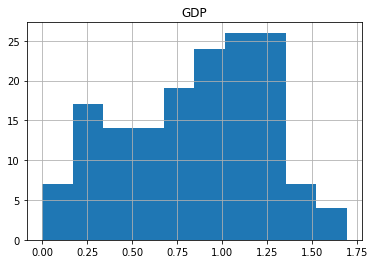

In [227]:
"""THIS IS A GOOD WAY TO SHOW DISTRIBUTION"""
#I want to figure out how to indicate where the top 10% of countries lie
df_2015.hist(column=["GDP"])

Slope: 2.2182271193090637


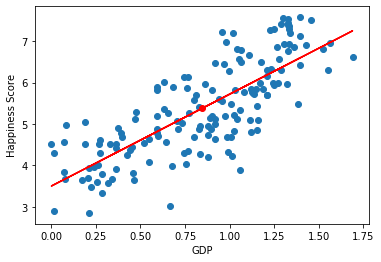

In [251]:
"""SCATTER PLOT OF GDP WITH HAPPINESS SCORE WITH BEST FIT LINE AND AVERAGE DATA POINT"""
#positive correlation here good sign
X = df_2015["GDP"]
Y = df_2015["Happiness Score"]

denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
y_pred = m * X + b

plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.scatter(X,Y)
plt.plot(X,y_pred,'r')
print("Slope: " + str(m))

#adding mean X and Y to show expected dot
X_mean = X.mean()
Y_mean = Y.mean()
plt.plot(X_mean,Y_mean,"or")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123de25c0>]],
      dtype=object)

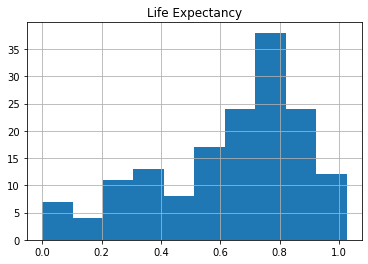

In [253]:
#There is a high concentration aroun 0.8
df_2015.hist(column=["Life Expectancy"])

Slope: 3.3560926526645307


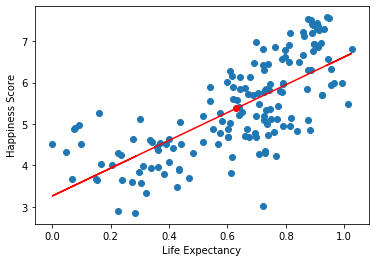

In [250]:
#We see that there is a increase in Happiness Score as Life Expectancy incrases. Life Expectancy can also pkay a role in health, etc.
X = df_2015["Life Expectancy"]
Y = df_2015["Happiness Score"]

denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
y_pred = m * X + b

plt.xlabel('Life Expectancy')
plt.ylabel('Happiness Score')
plt.scatter(X,Y)
plt.plot(X,y_pred,'r')
print("Slope: " + str(m))

#adding mean X and Y to show expected dot
X_mean = X.mean()
Y_mean = Y.mean()
plt.plot(X_mean,Y_mean,"or")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123c19eb8>]],
      dtype=object)

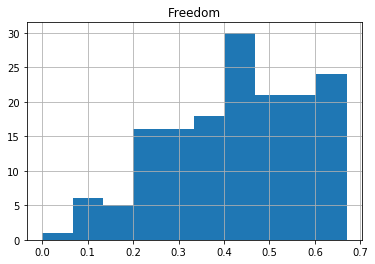

In [231]:
#There is a gradual increase from 0.0 to 0.7 
df_2015.hist(column=["Freedom"])

Slope: 4.31744126752469


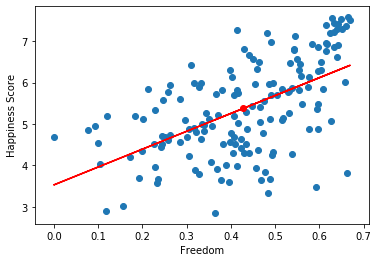

In [249]:
#We clearly see that Happiness Score gets higher as Freedom increases with some outliers.
X = df_2015["Freedom"]
Y = df_2015["Happiness Score"]

denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
y_pred = m * X + b

plt.xlabel('Freedom')
plt.ylabel('Happiness Score')
plt.scatter(X,Y)
plt.plot(X,y_pred,'r')
print("Slope: " + str(m))

#adding mean X and Y to show expected dot
X_mean = X.mean()
Y_mean = Y.mean()
plt.plot(X_mean,Y_mean,"or")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124123860>]],
      dtype=object)

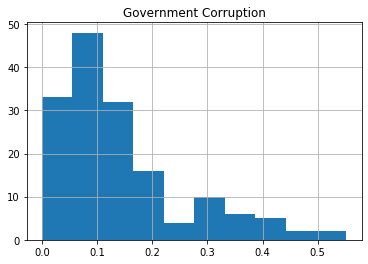

In [237]:
#Highly concentrated around 0.0 to 0.1
df_2015.hist(column=["Government Corruption"])

Slope: 3.7698161058484283


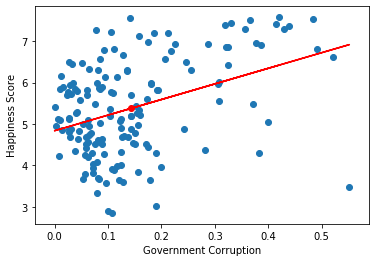

In [248]:
#We see that there isn't really a trend that shows where Happiness Score is mazimized. 
X = df_2015["Government Corruption"]
Y = df_2015["Happiness Score"]

denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
y_pred = m * X + b

plt.xlabel('Government Corruption')
plt.ylabel('Happiness Score')
plt.scatter(X,Y)
plt.plot(X,y_pred,'r')
print("Slope: " + str(m))

#adding mean X and Y to show expected dot
X_mean = X.mean()
Y_mean = Y.mean()
plt.plot(X_mean,Y_mean,"or")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1242ed898>]],
      dtype=object)

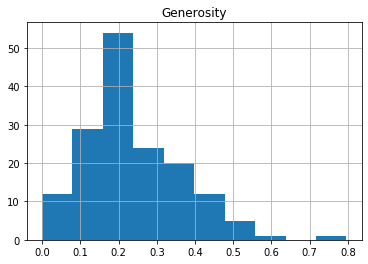

In [239]:
#A lot of concentration at 0.2
df_2015.hist(column=["Generosity"])

Slope: 1.629763966684131


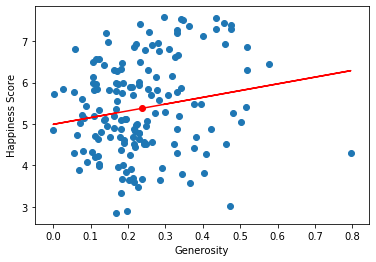

In [247]:
#There isn't really any correlation here
X = df_2015["Generosity"]
Y = df_2015["Happiness Score"]

denominator = X.dot(X) - X.mean() * X.sum()
m = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
y_pred = m * X + b

plt.xlabel('Generosity')
plt.ylabel('Happiness Score')
plt.scatter(X,Y)
plt.plot(X,y_pred,'r')
print("Slope: " + str(m))

#adding mean X and Y to show expected dot
X_mean = X.mean()
Y_mean = Y.mean()
plt.plot(X_mean,Y_mean,"or")

df_2015 quick summary: We made a histogram and scatterplot for each feature in the df_2015 dataframe. We use the histogram to see the trend of what value range is most represented by the dataset. The scatter plot is used to see the correlation between the feature and the Happiness Score. 

***I WANT TO SEE IF I CAN ADD RED DOTS TO INDICATE SOME COUNTRIES WITH CONSISTENT HIGH HAPPINESS SCORE***

## Data Analysis on 2016 Dataframe

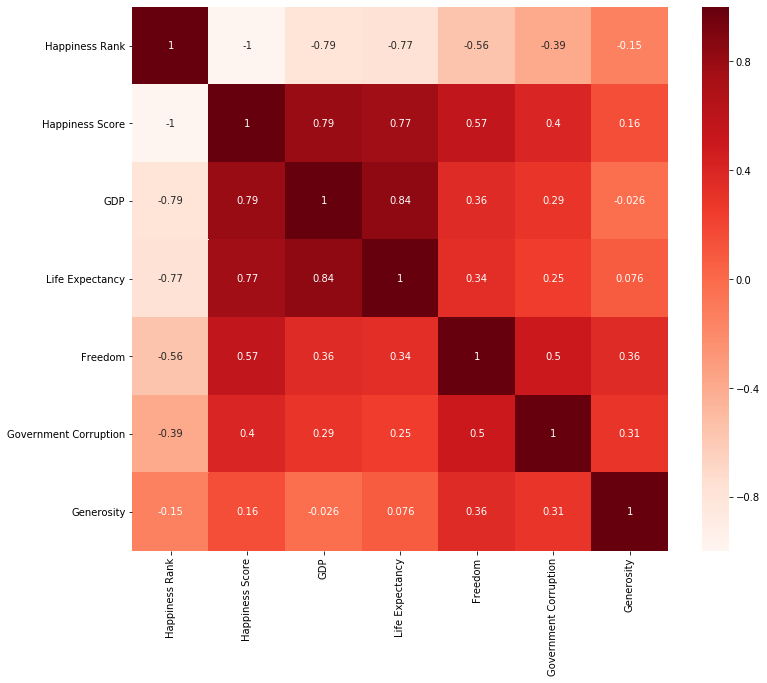

In [297]:
plt.figure(figsize=(12,10))
cor = df_2016.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [298]:
#Correlation with output variable
cor_target = abs(cor["Happiness Score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness Rank     0.995743
Happiness Score    1.000000
GDP                0.790322
Life Expectancy    0.765384
Freedom            0.566827
Name: Happiness Score, dtype: float64

In [306]:
print(df_2016[["GDP","Life Expectancy"]].corr())
print(df_2016[["GDP","Freedom"]].corr())
print(df_2016[["Life Expectancy","Freedom"]].corr())

                      GDP  Life Expectancy
GDP              1.000000         0.837067
Life Expectancy  0.837067         1.000000
              GDP   Freedom
GDP      1.000000  0.362283
Freedom  0.362283  1.000000
                 Life Expectancy   Freedom
Life Expectancy         1.000000  0.341199
Freedom                 0.341199  1.000000


## Data Analysis on 2017 Dataframe

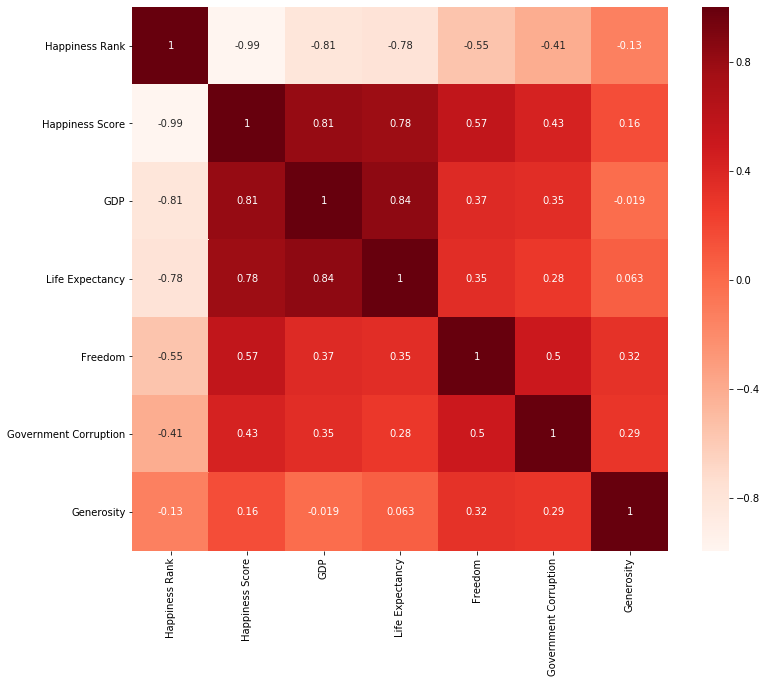

In [304]:
plt.figure(figsize=(12,10))
cor = df_2017.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [305]:
#Correlation with output variable
cor_target = abs(cor["Happiness Score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness Rank     0.992774
Happiness Score    1.000000
GDP                0.812469
Life Expectancy    0.781951
Freedom            0.570137
Name: Happiness Score, dtype: float64

In [307]:
print(df_2017[["GDP","Life Expectancy"]].corr())
print(df_2017[["GDP","Freedom"]].corr())
print(df_2017[["Life Expectancy","Freedom"]].corr())

                      GDP  Life Expectancy
GDP              1.000000         0.843077
Life Expectancy  0.843077         1.000000
              GDP   Freedom
GDP      1.000000  0.369873
Freedom  0.369873  1.000000
                 Life Expectancy   Freedom
Life Expectancy         1.000000  0.349827
Freedom                 0.349827  1.000000


## Data Analysis on 2018 Dataframe

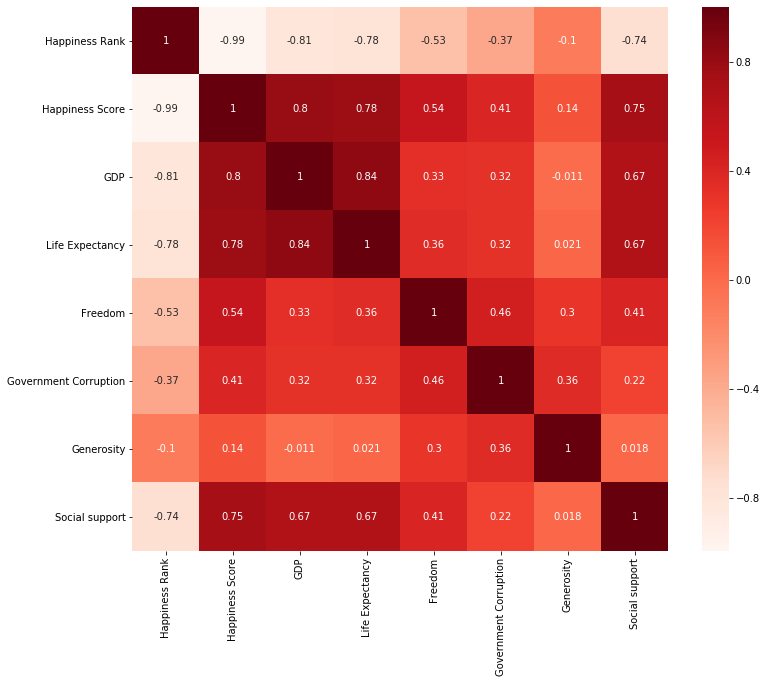

In [308]:
plt.figure(figsize=(12,10))
cor = df_2018.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [309]:
#Correlation with output variable
cor_target = abs(cor["Happiness Score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness Rank     0.991749
Happiness Score    1.000000
GDP                0.802124
Life Expectancy    0.775814
Freedom            0.544280
Social support     0.745760
Name: Happiness Score, dtype: float64

In [310]:
print(df_2018[["GDP","Life Expectancy"]].corr())
print(df_2018[["GDP","Freedom"]].corr())
print(df_2018[["Life Expectancy","Freedom"]].corr())

                      GDP  Life Expectancy
GDP              1.000000         0.844273
Life Expectancy  0.844273         1.000000
              GDP   Freedom
GDP      1.000000  0.332275
Freedom  0.332275  1.000000
                 Life Expectancy   Freedom
Life Expectancy         1.000000  0.355475
Freedom                 0.355475  1.000000


## Data Analysis on 2019 Dataframe

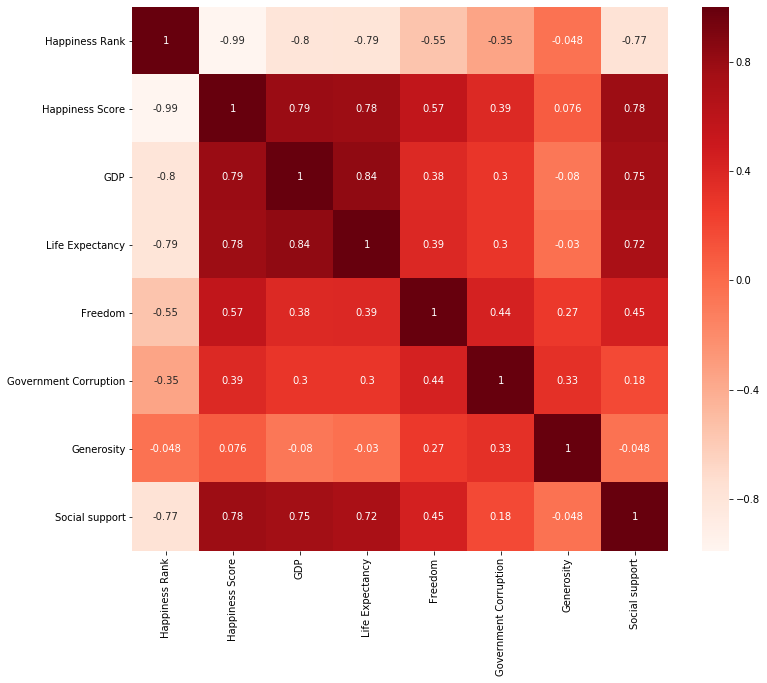

In [311]:
plt.figure(figsize=(12,10))
cor = df_2019.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [312]:
#Correlation with output variable
cor_target = abs(cor["Happiness Score"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Happiness Rank     0.989096
Happiness Score    1.000000
GDP                0.793883
Life Expectancy    0.779883
Freedom            0.566742
Social support     0.777058
Name: Happiness Score, dtype: float64

In [313]:
print(df_2019[["GDP","Life Expectancy"]].corr())
print(df_2019[["GDP","Freedom"]].corr())
print(df_2019[["Life Expectancy","Freedom"]].corr())

                      GDP  Life Expectancy
GDP              1.000000         0.835462
Life Expectancy  0.835462         1.000000
              GDP   Freedom
GDP      1.000000  0.379079
Freedom  0.379079  1.000000
                 Life Expectancy   Freedom
Life Expectancy         1.000000  0.390395
Freedom                 0.390395  1.000000
